In [5]:
import pandas as pd

Read csv from a file

In [6]:
import pandas as pd

# Read accelerometer data from a CSV file
df = pd.read_csv('accelerometer.csv')

# Display the DataFrame
print(df)


        wconfid  pctid      x      y      z
0             1     20  1.004  0.090 -0.125
1             1     20  1.004 -0.043 -0.125
2             1     20  0.969  0.090 -0.121
3             1     20  0.973 -0.012 -0.137
4             1     20  1.000 -0.016 -0.121
...         ...    ...    ...    ...    ...
152995        3    100  1.051  0.090 -0.262
152996        3    100  0.918  0.039 -0.129
152997        3    100  1.156 -0.094 -0.227
152998        3    100  0.934  0.203 -0.172
152999        3    100  1.199 -0.176  0.109

[153000 rows x 5 columns]


plot the data

<Axes: >

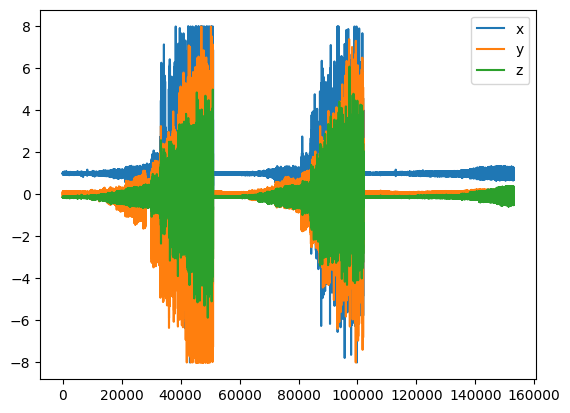

In [15]:
df.plot(y=['x', 'y', 'z'], kind='line')


Found an interesting CSV in a URL, can read the data and plot it directly from URL

In [26]:
url = 'https://raw.githubusercontent.com/xioTechnologies/Fusion/main/Python/sensor_data.csv'
df = pd.read_csv(url,index_col=0)

In [28]:
df

,Gyroscope X (deg/s),Gyroscope Y (deg/s),Gyroscope Z (deg/s),Accelerometer X (g),Accelerometer Y (g),Accelerometer Z (g),Magnetometer X (uT),Magnetometer Y (uT),Magnetometer Z (uT)
Time (s),,,,,,,,,
0.000000,0.016446,-0.151725,0.108090,0.001015,-0.020458,0.997081,15.30170,0.432853,-41.06483
0.010079,0.016542,-0.330857,0.047001,0.001497,-0.018035,0.999042,15.30666,-0.308428,-41.06782
0.020158,0.139735,0.027753,0.046942,0.001004,-0.023876,0.990247,15.30666,-0.308428,-41.06782
0.030238,0.016597,-0.091724,0.046941,-0.001428,-0.019559,0.986869,15.30666,-0.308428,-41.06782
0.040317,0.016576,-0.211201,-0.014052,-0.001898,-0.019532,0.991249,15.30666,-0.308428,-41.06782
...,...,...,...,...,...,...,...,...,...
135.288845,0.077252,0.030277,-0.187166,-0.000442,-0.023392,0.990738,15.30037,1.174198,-40.62421
135.298924,-0.107561,-0.089222,0.179131,-0.002367,-0.023870,0.991710,15.30037,1.174198,-40.62421
135.306484,0.138738,-0.149000,-0.126166,-0.000918,-0.020954,0.995133,15.30037,1.174198,-40.62421


plot data

<Axes: xlabel='Time (s)'>

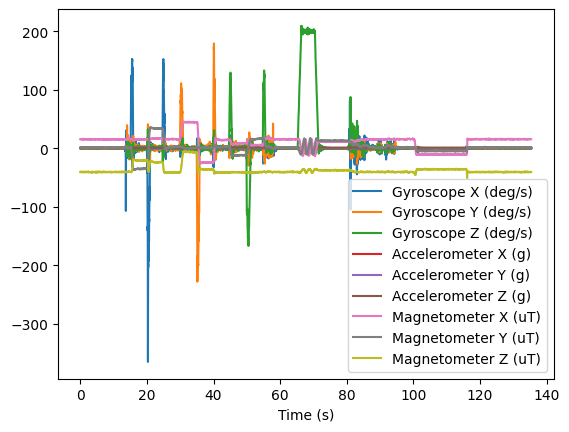

In [29]:
df.plot()


Isolate the data between start and end time

<Axes: xlabel='Time (s)'>

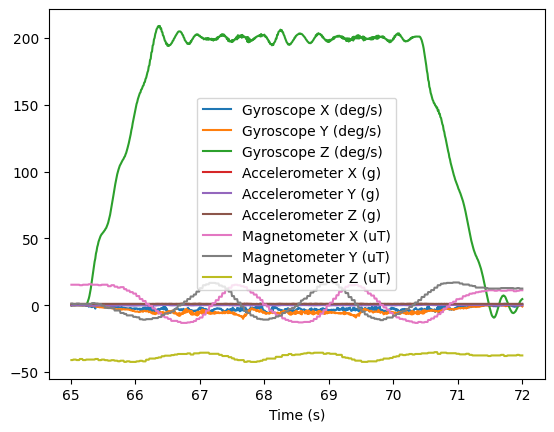

In [30]:
start_time = 65
end_time = 72
df.loc[(df.index >= start_time) & (df.index <= end_time)].plot()


Can read multiple files and combine them into a single dataframe

In [39]:
# Can make a function in one block to use in other blocks
import os
def get_all_files(directory):
  """
  This function gets all files under a parent dir even if in nested directories.

  Args:
    directory: The directory to search.

  Returns:
    A list of all files in the directory and all its subdirectories.
  """

  files = []
  for root, directories, filenames in os.walk(directory):
    for filename in filenames:
      files.append(os.path.join(root, filename))
  return files


In [41]:


# Directory path
directory = '/Users/awshift/Documents/PythonLearning2024/lectures/session-4/data'

# List to store dataframes
dfs = []



# Iterate over files in the directory
files = get_all_files(directory)
for filename in files:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Combine dataframes into a single dataframe
combined_df = pd.concat(dfs)

# Display the combined dataframe
print(combined_df)


               Time       accX      accY      accZ  \
0      1.573584e+12   2.994011  7.897556  6.131340   
1      1.573584e+12   3.195231  7.832878  5.285736   
2      1.573584e+12   2.811955  7.519071  5.309691   
3      1.573584e+12   2.320882  7.411274  5.692967   
4      1.573584e+12   2.157989  7.495116  5.841486   
...             ...        ...       ...       ...   
79301  1.573589e+12   4.871128 -1.472108  1.483590   
79302  1.573589e+12   8.277273 -1.556703  1.556090   
79303  1.573589e+12  10.733813 -1.559226  1.881957   
79304  1.573589e+12  12.732955 -1.849825  2.200023   
79305  1.573589e+12  14.393901 -1.856504  3.130903   

                                     DT              Hour  
0      2019-11-12 12:48:06.338000-06:00  2019-11-12 12:00  
1      2019-11-12 12:48:06.358000-06:00  2019-11-12 12:00  
2      2019-11-12 12:48:06.379000-06:00  2019-11-12 12:00  
3      2019-11-12 12:48:06.398000-06:00  2019-11-12 12:00  
4      2019-11-12 12:48:06.418000-06:00  2019-11-12

<Axes: >

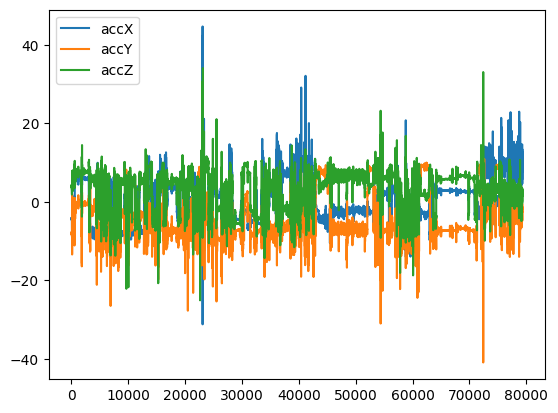

In [43]:
df.plot(y=['accX', 'accY', 'accZ'], kind='line')
